# Python入門 ＜紙折問題＞

## 【問題1】べき乗の算術演算子を使用した実装
---

べき乗の算術演算子を使用したプログラムを作ってください。  
雛形として紙を1回折った時の厚さを計算するコードを用意しました。これを43回折った時のコードに書き換えてください。

In [50]:
THICKNESS = 0.00008
folded_thickness = THICKNESS * 2 ** 43
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


## 【問題2】単位の変換
---

単位がメートルだと実感が湧きづらいので、◯◯**万キロメートル** に変換して表示させてください。

In [51]:
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness / 10000000))

厚さ： 70.37万キロメートル


## 【問題3】for文を使用して作成
---
次に、for文を使用したプログラムを作ってください。

べき乗の算術演算子は使ってはいけません。算術演算子は四則演算（<font color="red">+、-、*、/</font>）のみ使えます。

In [52]:
folded_thickness = THICKNESS
for i in range(43):
    folded_thickness *= 2
print("厚さ： {:.2f}万キロメートル".format(folded_thickness / 10000000))

厚さ： 70.37万キロメートル


## 【問題4】計算時間の比較
---
以上の2つの方法はどちらも正しいですが、コードの良さを比較する際には例えば以下のような点で評価されます。

- 実行速度
- メモリの使用量
- 可読性
- 拡張性
- 再利用性

今回は実行速度を比較してみます。

以下の雛形を使用して、2つの方法の実行時間を出力して、比較してください。変数の定義や <font color="red">print</font> 文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください。

In [53]:
### べき乗の算術演算子を使用した場合 ###

import time
start = time.time()
#####
# ここに比較したいコードを貼り付ける
folded_thickness = THICKNESS * 2 ** 43
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 7.653236389160156e-05[s]


In [54]:
### for文を使用した場合 ###

import time
start = time.time()
#####
# ここに比較したいコードを貼り付ける
folded_thickness = THICKNESS
for i in range(43):
    folded_thickness *= 2
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 0.00012421607971191406[s]


### 《発展：繰り返し回数を増やす》

43回程度では比較の差が現れにくいかもしれません。そのような場合は、紙を折る回数をさらに増やして差を明確にしてみると良いでしょう。  

↓  
回数を**1000回**にした場合で比較してみる。

In [55]:
### べき乗の算術演算子を使用した場合 ###

import time
start = time.time()
#####
# ここに比較したいコードを貼り付ける
folded_thickness = THICKNESS * 2 ** 1000
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 4.458427429199219e-05[s]


In [56]:
### for文を使用した場合 ###

import time
start = time.time()
#####
# ここに比較したいコードを貼り付ける
folded_thickness = THICKNESS
for i in range(1000):
    folded_thickness *= 2
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 0.0001659393310546875[s]


### 《発展：マジックコマンドを使う》

実行時間は実行する度にやや変化することがあるため、複数回計測することが一般的です。<font color="red">time</font> モジュールとfor文を組み合わせることでも実装できます。また、Jupyter Notebookでは<font color="red">%timeit</font>という **マジックコマンド** でも計測できます。マジックコマンドとは標準のPythonの実行システムには用意されていない、Jupyter Notebook 特有の機能です。

In [57]:
%%timeit
#####
# ここに比較したいコードを貼り付ける
folded_thickness = THICKNESS * 2 ** 43
#####

The slowest run took 37.99 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 82 ns per loop


In [58]:
%%timeit
#####
# ここに比較したいコードを貼り付ける
folded_thickness = THICKNESS
for i in range(43):
    folded_thickness *= 2
#####

100000 loops, best of 5: 2.59 µs per loop


## 【問題5】リストへの保存
---
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。

In [59]:
folded_thickness_list = [THICKNESS]
folded_thickness = THICKNESS
for i in range(43):
    folded_thickness *= 2
    folded_thickness_list.append(folded_thickness)

print("リストには{}個の値が格納されている".format(len(folded_thickness_list)))

リストには44個の値が格納されている


## 【問題6】折れ線グラフの表示
---
グラフの描画には Matplotlib という ライブラリ を用います。リストへ記録するコードの後ろで以下の雛形を使用してください。

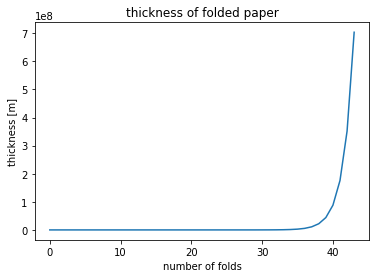

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness [m]")
plt.plot(folded_thickness_list)  # 「リスト名」のところにリストの変数名を入れる
plt.show()

>37回辺りまでは厚みの変化は見られないが、40回目あたりで大きく厚さが増えていることがグラフから読み取れる。

## 【問題7】グラフのカスタマイズ
---
グラフをより見やすくカスタマイズしてみましょう。カスタマイズしたグラフを最低3種類作成してください。例えば以下のように書き換えることで、線の色を赤に変更できます。

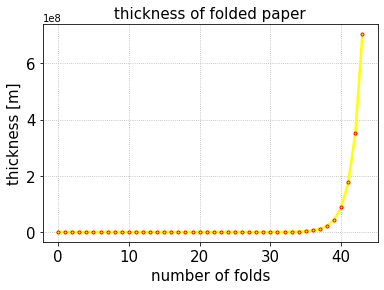

In [61]:
# 赤い折れ線グラフを表示する。
plt.title("thickness of folded paper",  fontsize=15)  # ラベルのフォントサイズを設定
plt.xlabel("number of folds", fontsize=15)  # ラベルのフォントサイズを設定
plt.ylabel("thickness [m]", fontsize=15)    # ラベルのフォントサイズを設定
plt.tick_params(labelsize=15) # 軸の値に関する設定を行う
plt.plot(folded_thickness_list, marker='.', markeredgecolor='red', color='yellow', linewidth=2.5) # 線の色と太さ、マーカーをドットに設定
plt.grid(linestyle='dotted')  #　グリッド表示
plt.show()